# Finding Heavy Traffic Indicators on I-94

This is a Dataquest project. The goal of this project is to analyze data from the westbound traffic on the I-94 highway; we want to dtermine a few indicators of heavy traffic, be it weather, time of day, time of week, etc.

The dataset was made available by John Hogue; it can be found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

# The Dataset

The data was collected by a station located midway between St. Paul and Minneapolis, MN. And the station only records westbound traffic.

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# I want to get a preview of this data set
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
# I want to get a preview of this data set
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
# And some information
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


There are 9 columns and 48304 rows in this dataset; there are no null values.

Each row corresponds to an hour, describing the specific weather conditions at the time. The data ranges from October 2nd, 2012 at 9 AM to September 30th, 2018 at 11 PM; this is over a six year period.

# Analyzing Traffic Volume

We will examine the data in the `traffic_volume` column.

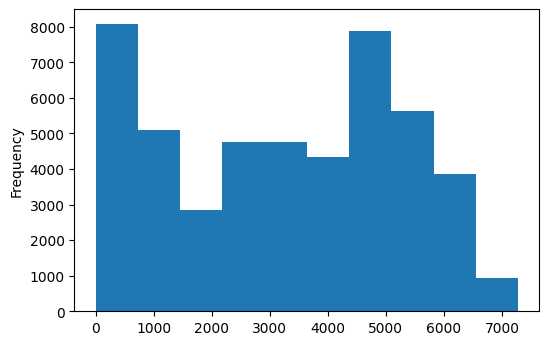

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist()
plt.show()

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Out of 48,204 counts, there is variation in the traffic volume, from 0 to 7280 at each hour. The average value was around 3260.

A quarter of the time, 1193 or fewer cars were measured; another quarter of the time, that value was over quadruple the previous figure, at 4933 or more.

This high variation could be the result of daytime and nighttime activity; let's compare the data from those times.

# Does Day and Night Affect Traffic Volume

Let us first define what is "day" and what is "night":
* Day: 7 AM to 7 PM
* Night: 7 PM to 7 AM

This is a more-or-less arbitrary distinction, based mainly on our usual perceptions of those times of day; they have been divided into equal amounts of time, 12 hours each, for cleaner analysis.

In [10]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

# I will separate the data for each part of day
day = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic[(traffic['date_time'].dt.hour < 7) | (traffic['date_time'].dt.hour >= 19)]
print(night.shape)

(23877, 9)
(24327, 9)


The daytime data is shorter, which means some hours were not recorded.

# Does Day and Night Affect Traffic Volume (cont.)

Let's plot a side-by-side chart of the day and night data.

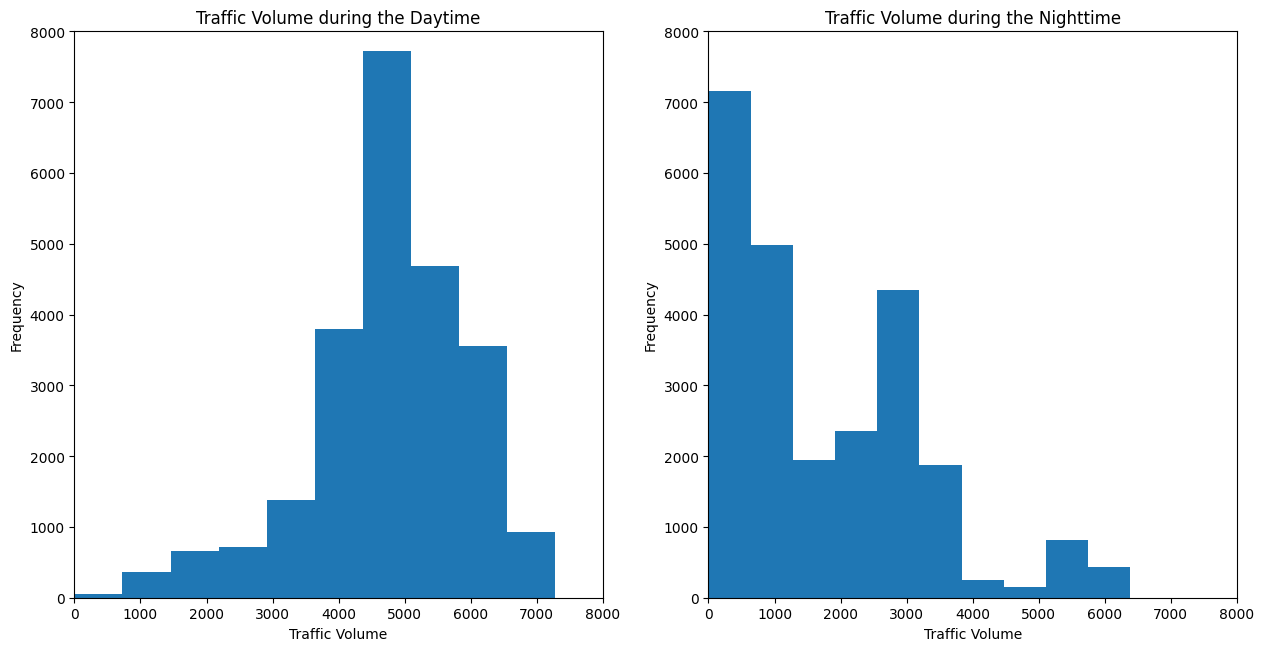

In [15]:
plt.figure(figsize=(15,7.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume during the Daytime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,8000])
plt.ylim([0,8000])

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume during the Nighttime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,8000])
plt.ylim([0,8000])

plt.show()

In [16]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [17]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The daytime data is skewed to the left; most of the traffic volume was high. The nighttime data is right skewed, meaning that much of the volume was low.

The average volume during the day is about 3 times the average during the night.

Given the lighter traffic volume at night, we will focus only on daytime data from here on forward.

# Time Indicators

We have determined that time is an indication of heavy traffic. So, let's see how traffic volume changes by the following parameters:
* Month
* Day of the week
* Time of day

In [20]:
# I will get the traffic volume by month
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-20-df7827b8a3f8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

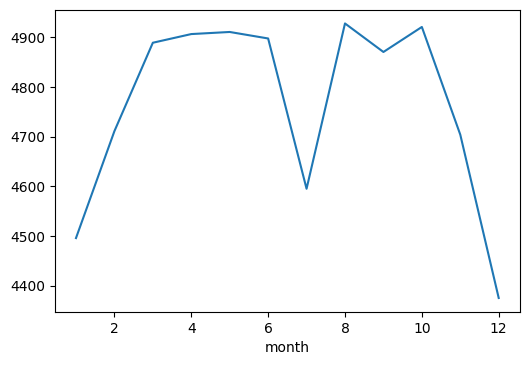

In [21]:
# And plot it
by_month['traffic_volume'].plot.line()
plt.show()

Traffic is highest during the warmer months and lower during the cooler months. There is a dip in volume from October to February. The warmer months normally see volumes close to 5000 cars per hour.

Interestingly enough, there is also a dip during July, a warm month. So, let us examine the month of July over the six years.

<ipython-input-31-cba92ca5a37a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



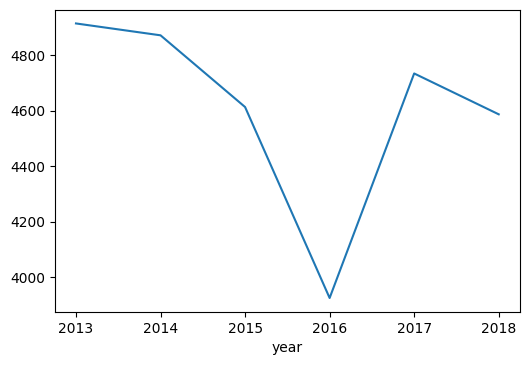

In [31]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

The volume seems quite high for July, except for a dip in 2015 and 2016. This might explain the low numbers during July overall.

The dip in 2016 might have been the result of [construction](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696), creating road closures.

# Time Indicators (cont.)

Now, let us look at the volume by day; in the data, "0" corresponds to Monday and "6" to Sunday.

In [26]:
# I will get the traffic volume by day
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

<ipython-input-26-26ac2868f6aa>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

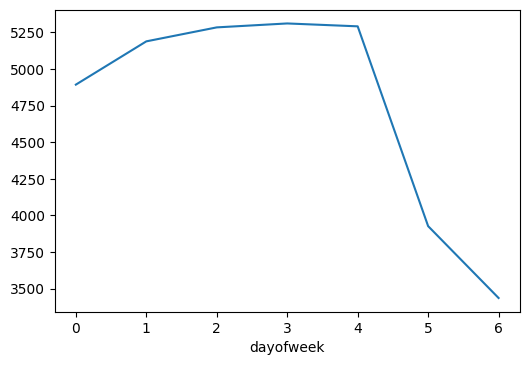

In [24]:
# And plot it
by_dayofweek['traffic_volume'].plot.line()
plt.show()

We can see that traffic is much lighter on the weekends; the average volume per weekday is around 5000 cars. On the weekends, it drops below 4000.

Monday is slightly lower than the other weekdays.

# Time Indicators (cont.)

Now, we'll explore the volume based on the time of day. The weekend values may skew the average, so we will look at the weekend and weekday separately.

In [37]:
day['hour'] = day['date_time'].dt.hour
weekday = day[day['dayofweek'] <= 4] # 4 == Friday
weekend = day[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_weekday = weekday.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_weekday['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-37-3fb471d21e5e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



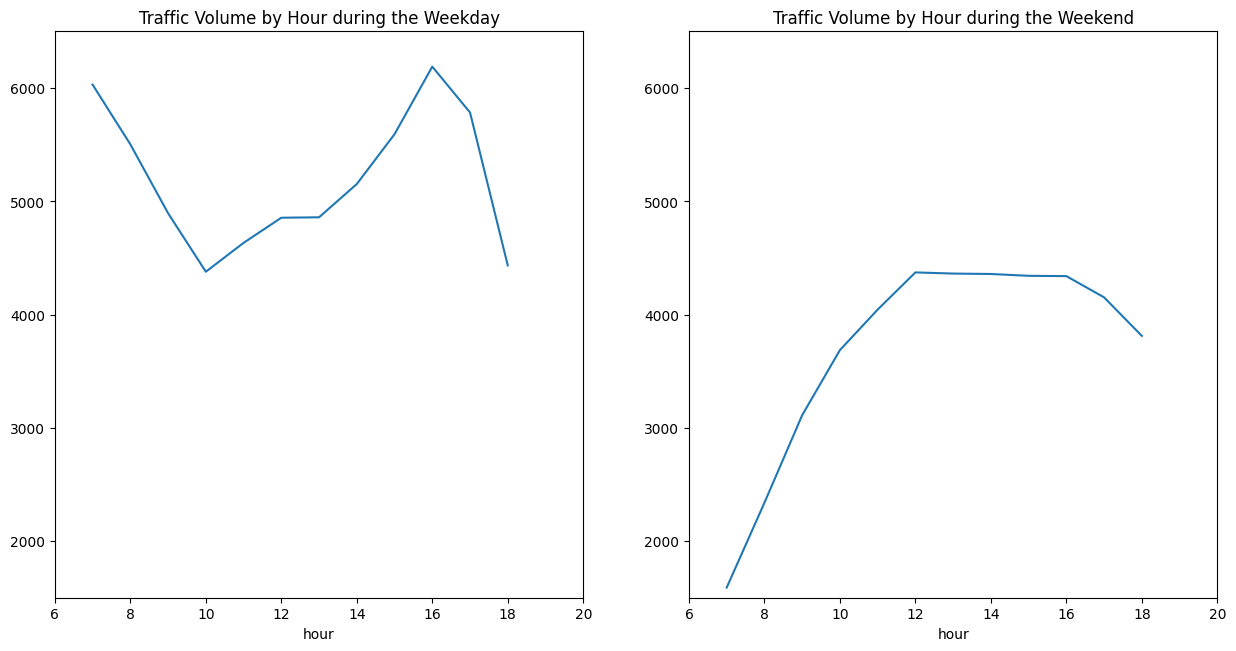

In [40]:
plt.figure(figsize=(15,7.5))

plt.subplot(1, 2, 1)
by_hour_weekday['traffic_volume'].plot.line()
plt.title('Traffic Volume by Hour during the Weekday')
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic Volume by Hour during the Weekend')
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.show()

Traffic volume is higher during the weekdays during rush hour, as expected. The volumes peak on the weekdays occur at the 7th and 16th hours, 7 AM and 4 PM, respectively; there are over 6000 cars at these times, on average.

We have found the following time-related indications of heavy traffic:
* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on weekdays compared to weekends.
* On weekdays, the rush hours are around 7 AM and 4 PM.

# Weather Indicators

Weather can also be a heavy indicator of traffic.

The dataset has the following columns dedicated to recording weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, and `weather_description`.

A few of these columns are numerical, so let's start by looking up their correlation values with `traffic_volume`.

In [41]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
year             -0.003557
hour              0.172704
Name: traffic_volume, dtype: float64

The `temp` column shows the strongest correlation with `traffic_volume`, with a coefficient of almost +0.13. The rest of the weather columns show a very weak correlation.

Let's visualize the correlation with a scatterplot. We should note that the temperatures are given in Kelvin.

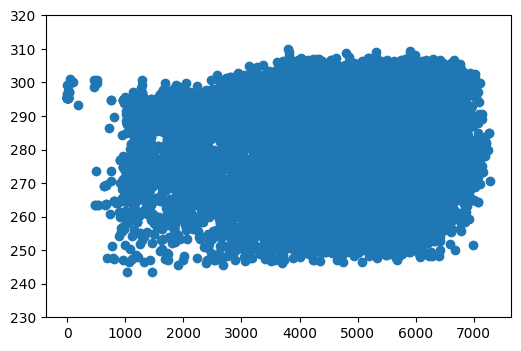

In [44]:
plt.scatter(day['traffic_volume'], day['temp'])
plt.ylim(230, 320) # Two temperatures at 0 K mess up the plot
plt.show()

It seems like temperature is not that reliable of an indicator, as there is no clear pattern.

# Weather Types

There are two categorical weather columns: `weather_main` and `weather_description`; they are short and long textual descriptions of the weather, respectively.

We're going to calculate the average traffic volume associated with each unique value in these two columns.

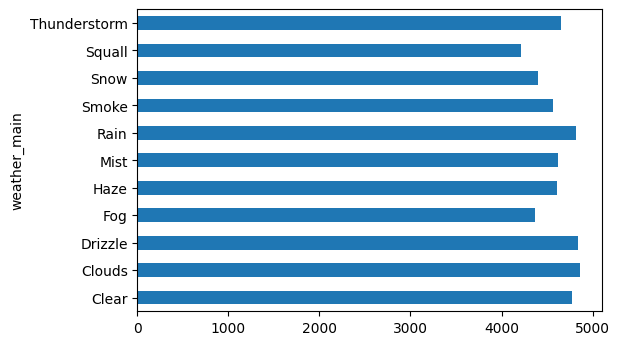

In [47]:
# I will plot the volumes for weather_main
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

The volumes associated with each weather type are more or less the same, not exceeding 5000. It's hard to find a heavy traffic indicator here.

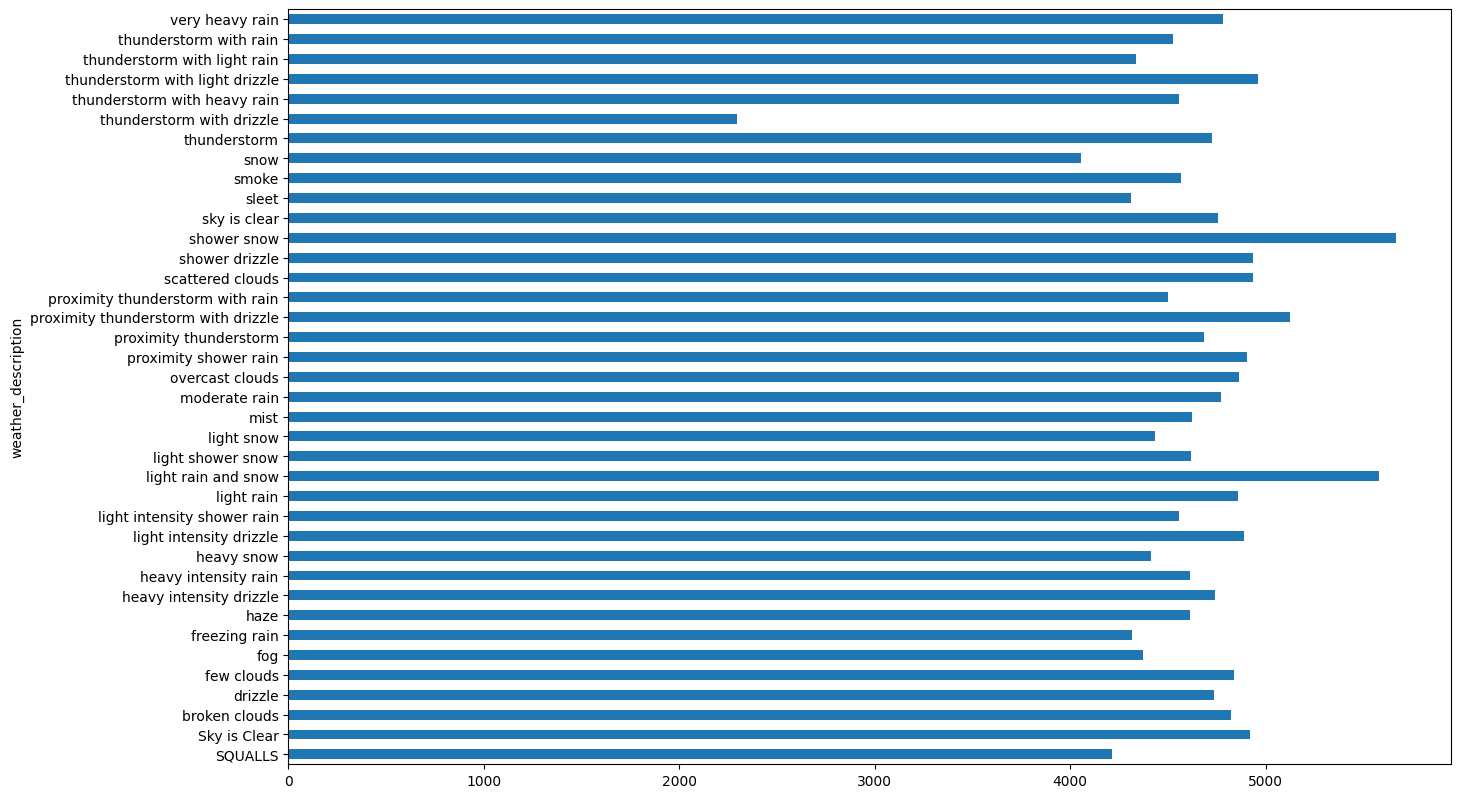

In [51]:
# I will plot the volumes for weather_description
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(15,10))
plt.show()

With these weather types, there are three that are easy to pick out, as they also have associated volumes that exceed 5000. They are:
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

These weather types are bad, but not particularly bad. It is possible that this type of slightly bad weather might make more people choose driving cars, rather than walking or biking. Thus, this results in an upsurge of highway traffic. Additionally, there are some worse weather types, like "thunderstorm with heavy rain"; perhaps this weather might not have a large effect on traffic because people might be discouraged to go out all together.

# Conclusions

In this project, we tried to find a few indicators of heavy traffic on the westbound traffic of I-94 Interstate highway. We managed to find time and weather indicators:

Time indicators:
* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on weekdays compared to weekends.
* On weekdays, the rush hours are around 7 AM and 4 PM.

Weather indicators:
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle